### 5. Resultados Preliminares

#### Pregunta 3 - ¿Existen grupos de juegos con patrones similares que permitan agruparlos para recomendaciones?

#### Análisis Preliminar de los Datos

#### Construcción del Conjunto de Datos
Con respecto a la construcción del conjunto de los datos, para el caso particular de esta pregunta se realiza una separación binaria en el atributo 'game_profile_genre' que permitirá tomar de forma granular el genero de un juego y no como conjunto.

#### Entrenamiento y Evaluación de Modelos

#### Conclusiones Preliminares

#### Posibles Mejoras



In [66]:
import pandas as pd

csv_path = './df_reduced.csv'
df = pd.read_csv(csv_path, low_memory=False)

In [67]:
#Binarizacion de los generos en base a la columna 'game_profile_genre'

df['game_profile_genre'] = df['game_profile_genre'].fillna('')

df['generos_lista'] = df['game_profile_genre'].str.split(',') 

todos_los_generos = []
for lista in df['generos_lista']:
    for genero in lista:
        genero = genero.strip()
        if genero != '' and genero not in todos_los_generos:
            todos_los_generos.append(genero)

for genero in todos_los_generos:
    df[genero] = 0 

for i in range(len(df)):
    for genero in df.loc[i, 'generos_lista']:
        genero = genero.strip()
        if genero in todos_los_generos:
            df.loc[i, genero] = 1

df = df.drop(columns=['generos_lista'])


C:\Users\sebas\AppData\Local\Temp\ipykernel_3404\2803342547.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[genero] = 0
C:\Users\sebas\AppData\Local\Temp\ipykernel_3404\2803342547.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[genero] = 0
C:\Users\sebas\AppData\Local\Temp\ipykernel_3404\2803342547.py:15: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) ins

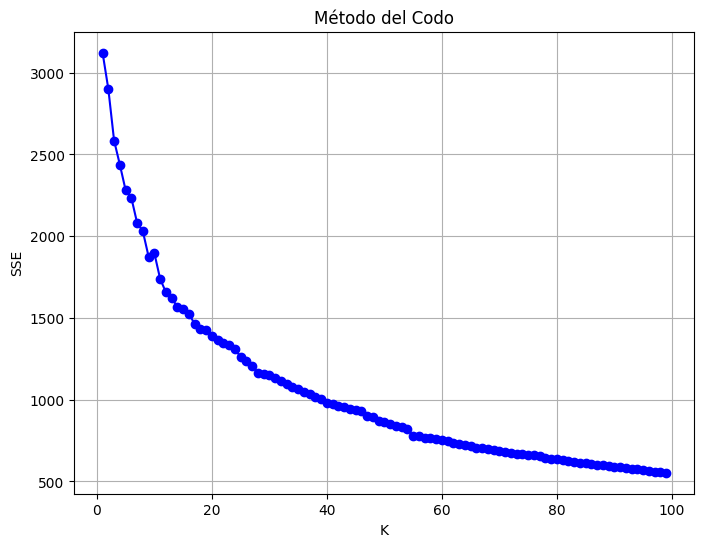

In [92]:
# busqueda del mejor k
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# filtramos para tener juegos con reviews suficientes y con un score bueno
df_filtered = df[(df['review_review_count'] > 10) & (df['game_review_score'] > 80)]
genre_columns = df.columns[10:]
features = df_filtered[genre_columns]

k_range = range(1, 100)
sse = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', color='b')
plt.title('Método del Codo')
plt.xlabel('K')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

C:\Users\sebas\AppData\Local\Temp\ipykernel_3404\2312143975.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_filtered['cluster_kmeans'] = kmeans.fit_predict(features)
C:\Users\sebas\AppData\Local\Temp\ipykernel_3404\2312143975.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster_kmeans'] = kmeans.fit_predict(features)
C:\Users\sebas\AppData\Local\Temp\ipykernel_3404\2312143975.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` ma

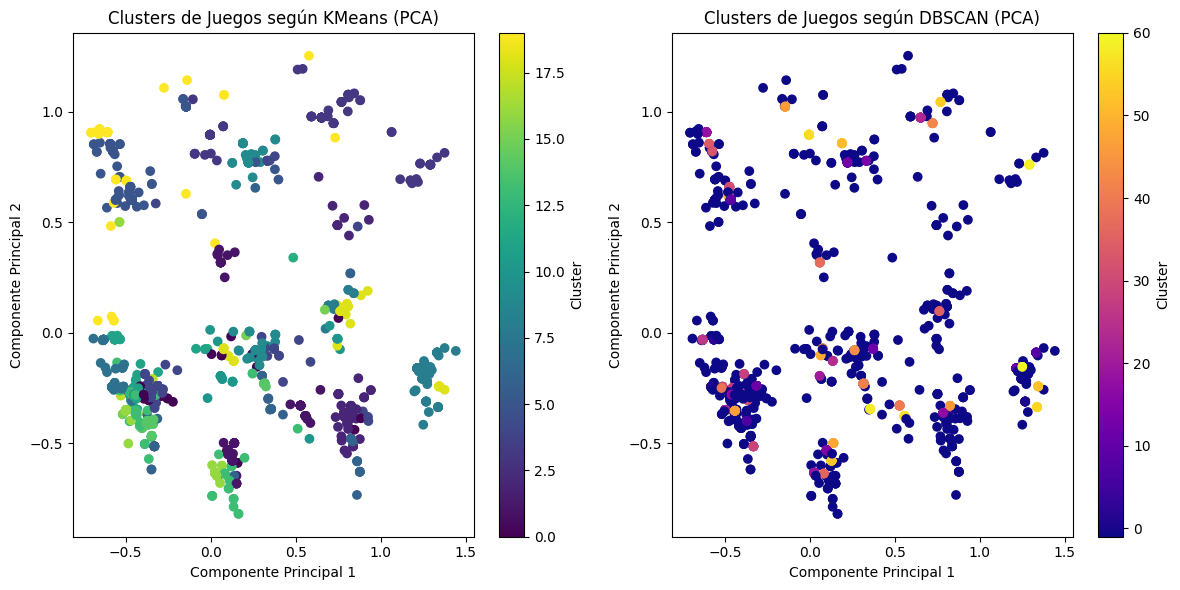

Juegos en el cluster 5, usando kmeans:
- Arcanum: Of Steamworks and Magick Obscura
- Baldur's Gate II: Enhanced Edition
- Betrayal at Krondor
- Breath of Fire IV
- Chrono Cross
- Disgaea 2: Cursed Memories
- Disgaea 4: A Promise Unforgotten
- Disgaea DS
- Disgaea: Afternoon of Darkness
- Disgaea: Hour of Darkness
- Dragon Age: Origins - Awakening
- Dragon Age: Origins - Ultimate Edition
- Dragon Quest IX: Sentinels of the Starry Skies
- Dragon Quest V: Hand of the Heavenly Bride
- Dragon Quest VIII: Journey of the Cursed King
- Dragon Warrior Monsters 2: Cobi's Journey
- Etrian Odyssey IV: Legends of the Titan
- EverQuest
- Final Fantasy Anthology
- Final Fantasy Chronicles
- Final Fantasy IV Advance
- Final Fantasy IX
- Final Fantasy Tactics
- Final Fantasy Tactics Advance
- Final Fantasy VI Advance
- Final Fantasy VII
- Final Fantasy X
- Final Fantasy XII
- Final Fantasy XII International Zodiac Job System
- Fire Emblem: Awakening
- Fire Emblem: Path of Radiance
- Fire Emblem: Radian

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

# aplicamos kmeans
kmeans = KMeans(n_clusters=20, random_state=0)
df_filtered['cluster_kmeans'] = kmeans.fit_predict(features)

# aplicamos dbscan
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_filtered['cluster_dbscan'] = dbscan.fit_predict(features)

# reducimos dimensiones para graficar y ver los clusters
pca = PCA(n_components=2)
pca_components = pca.fit_transform(features)

df_filtered['PCA1'] = pca_components[:, 0]
df_filtered['PCA2'] = pca_components[:, 1]


plt.figure(figsize=(12, 6))

# grfico pca
plt.subplot(1, 2, 1)
plt.scatter(df_filtered['PCA1'], df_filtered['PCA2'], c=df_filtered['cluster_kmeans'], cmap='viridis')
plt.title('Clusters de Juegos según KMeans (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')

# grafico dbscan
plt.subplot(1, 2, 2)
plt.scatter(df_filtered['PCA1'], df_filtered['PCA2'], c=df_filtered['cluster_dbscan'], cmap='plasma')
plt.title('Clusters de Juegos según DBSCAN (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(label='Cluster')

plt.tight_layout()
plt.show()

# funcion que nos permite ver los nombres asociados a un cluster particular
def juegos_por_cluster(df, cluster_num, type='dbscan'):
    juegos_cluster = df[df[f'cluster_{type}'] == cluster_num]['game_game_name']
    
    if juegos_cluster.empty:
        print(f"No se encontraron juegos en el cluster {cluster_num}.")
    else:
        print(f"Juegos en el cluster {cluster_num}, usando {type}:")
        for juego in juegos_cluster:
            print(f"- {juego}")

juegos_por_cluster(df_filtered, 5, 'kmeans')         
